In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [107]:
# Sample data to play with.
#y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
#x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

#plt.scatter(x, y)

In [108]:
df=pd.read_csv('crime.csv')


#next(df, None)

In [109]:
df.head()

,City,Population,violent_crime,murder,rape,rape_2,Robbery,assault,Prop_crime,Burglary,theft,motor_theft,arson
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [110]:
#df1 = df.drop([0,1,2,3], axis=0)

In [111]:
# property crime = a + population + (population)^2 + Murder + Robbery

#(8) = a + (1) +(1)^2 + (3) + (6)



In [112]:
df['Population'] = df.Population.str.replace(",", '')

In [113]:
df['Population'] = df.Population.astype(float)

In [114]:
df.head()

,City,Population,violent_crime,murder,rape,rape_2,Robbery,assault,Prop_crime,Burglary,theft,motor_theft,arson
0,Adams Village,1861.000,0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956.000,791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,6388.000,23,0.000,nan,3,4,16,223,53,165,5,nan


In [115]:
df.drop('rape', axis =1, inplace = True)

In [116]:
df['population2'] =df.Population**2

In [117]:
df['Robbery'] = df.Robbery.str.replace(',','')

In [118]:
df['Robbery'] = df.Robbery.astype(float)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City             351 non-null object
Population       348 non-null float64
violent_crime    348 non-null object
murder           348 non-null float64
rape_2           348 non-null object
Robbery          348 non-null float64
assault          348 non-null object
Prop_crime       348 non-null object
Burglary         348 non-null object
theft            348 non-null object
motor_theft      348 non-null object
arson            187 non-null float64
population2      348 non-null float64
dtypes: float64(5), object(8)
memory usage: 35.7+ KB


In [120]:
df['Prop_crime'] = df.Prop_crime.str.replace(',', '')

In [121]:
df['Prop_crime'] = df.Prop_crime.astype(float)

In [122]:
#rob =df["robbery"]

In [123]:
#mur = df1[3]

In [124]:
#pop =df1[1]

In [125]:
#pop2 = (df1[1])^2

In [126]:
df.dropna(inplace = True)

In [127]:
X = df[['Population','population2','murder','Robbery']]

In [128]:
y = df["Prop_crime"]

In [129]:
# Sample data to play with.
#y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
#x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

#plt.scatter(x, y)


Coefficients: 
 [ 2.38682319e-02 -8.38078043e-08  1.37911735e+02  2.94060723e+00]
Intercept: 
 -59.88513097590584


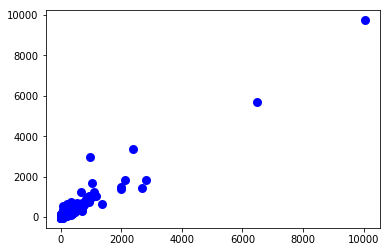

In [135]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
#plt.scatter(X, y, color='black')
plt.scatter(y, regr.predict(X), color='blue', linewidth=3)
plt.show()

In [133]:
regr.score(X,y)

0.9264874498381567

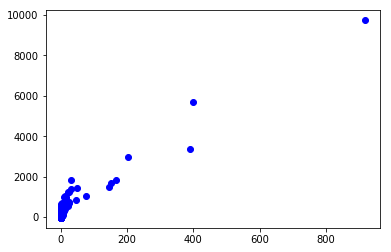

In [143]:
plt.scatter(X.Robbery, regr.predict(X), color='blue', linewidth=1)
plt.show()

In [144]:
regr.score(X,y)

0.9264874498381567